In [3]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_data = pd.read_csv('../data/contributors_summary_lappis.csv')
eps_data = pd.read_csv('../data/contributors_summary_eps_mds.csv')

display(lappis_data.head(), eps_data.head())

,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'..."
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':..."
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'..."
3,rodmaia,242,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 7, 'pull_requests': 16, 'issues': ..."
4,cmckni3,2436,219,JavaScript,"{'2017-01': 30, '2017-02': 34, '2017-03': 18, ...","{'commits': 1266, 'pull_requests': 182, 'issue..."


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,StrangeUnit28,552,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 410, 'pull_requests': 43, 'issues'..."
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ..."
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'..."
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ..."
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues..."


In [4]:
lappis_summary = lappis_data.describe()

eps_summary = eps_data.describe()

display(lappis_summary, eps_summary)

,contributions,repositories
count,714.000000,714.00000
mean,3758.656863,54.07563
std,19087.678122,128.58169
min,0.000000,1.00000
25%,301.250000,17.00000
50%,1028.500000,34.00000
75%,3145.250000,60.00000
max,462122.000000,2300.00000


,contributions,repositories
count,6254.000000,6254.000000
mean,2344.217141,52.418612
std,5376.626238,91.790838
min,0.000000,0.000000
25%,158.000000,14.000000
50%,650.000000,31.000000
75%,2358.000000,61.000000
max,167547.000000,4241.000000


In [5]:
import pandas as pd
import json

def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Prepare and clean data
def prepare_data(df):
    # Converting JSON strings to dictionaries
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)
    
    # Creating separate columns for each type of contribution
    df_types = pd.json_normalize(df['contribution_types'])
    for col in df_types.columns:
        df[col] = df_types[col]
    
    return df

# Applying outlier removal for each contribution type
def remove_type_outliers(df):
    for col in ['commits', 'pull_requests', 'issues', 'reviews']:
        df = remove_outliers(df, col)
    return df

# Applying the functions
lappis_data = prepare_data(lappis_data)
eps_data = prepare_data(eps_data)

lappis_filtered = remove_type_outliers(lappis_data)
eps_filtered = remove_type_outliers(eps_data)

# Display the results
display(lappis_filtered.describe(), eps_filtered.describe())


,contributions,repositories
count,646.000000,646.000000
mean,1530.165635,41.222910
std,1721.395150,40.798805
min,0.000000,1.000000
25%,249.250000,15.000000
50%,836.500000,31.000000
75%,2202.500000,52.750000
max,7401.000000,334.000000


,contributions,repositories
count,5561.00000,5561.000000
mean,1059.70437,41.594318
std,1307.68063,48.583779
min,0.00000,0.000000
25%,130.00000,13.000000
50%,485.00000,28.000000
75%,1497.00000,53.000000
max,5649.00000,784.000000


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Função para normalizar os dados de um DataFrame
def normalize_data(df, column):
    scaler = MinMaxScaler()
    df[column + '_normalized'] = scaler.fit_transform(df[[column]])
    return df

# Aplicar a normalização para as colunas de 'contributions' nos DataFrames filtrados
lappis_normalized = normalize_data(lappis_filtered, 'contributions')
eps_normalized = normalize_data(eps_filtered, 'contributions')

# Exibir os DataFrames normalizados
display(lappis_normalized.head(), eps_normalized.head())


/tmp/ipykernel_2840928/4086019827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_normalized'] = scaler.fit_transform(df[[column]])
/tmp/ipykernel_2840928/4086019827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_normalized'] = scaler.fit_transform(df[[column]])


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,contributions_normalized
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'...",0.046210
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':...",0.172814
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",0.053641
3,rodmaia,242,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 7, 'pull_requests': 16, 'issues': ...",0.032698
4,cmckni3,2436,219,JavaScript,"{'2017-01': 30, '2017-02': 34, '2017-03': 18, ...","{'commits': 1266, 'pull_requests': 182, 'issue...",0.329145


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,contributions_normalized
0,StrangeUnit28,552,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 410, 'pull_requests': 43, 'issues'...",0.097716
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ...",0.217384
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'...",0.371924
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ...",0.017525
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues...",0.199327


In [7]:
# Verificar o número de usuários em cada conjunto
lappis_count = lappis_normalized.shape[0]
eps_count = eps_normalized.shape[0]

# Se o EPS tiver mais usuários, fazer undersampling
if eps_count > lappis_count:
    eps_balanced = eps_normalized.sample(n=lappis_count, random_state=42)
else:
    eps_balanced = eps_normalized

# Exibir o número de usuários após o balanceamento
print(f"Lappis users: {lappis_count}, EPS users after undersampling: {eps_balanced.shape[0]}")

# Exibir as primeiras linhas dos DataFrames balanceados
display(lappis_normalized.head(), eps_balanced.head())


Lappis users: 646, EPS users after undersampling: 646


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,contributions_normalized
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'...",0.046210
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':...",0.172814
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",0.053641
3,rodmaia,242,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 7, 'pull_requests': 16, 'issues': ...",0.032698
4,cmckni3,2436,219,JavaScript,"{'2017-01': 30, '2017-02': 34, '2017-03': 18, ...","{'commits': 1266, 'pull_requests': 182, 'issue...",0.329145


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,contributions_normalized
993,nobuhikosawai,836,38,TypeScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 705, 'pull_requests': 86, 'issues'...",0.147991
1202,arsaboo,3150,53,Python,"{'2017-01': 8, '2017-02': 17, '2017-03': 8, '2...","{'commits': 2369, 'pull_requests': 269, 'issue...",0.557621
5650,thomasdelaet,284,17,Python,"{'2017-01': 10, '2017-02': 0, '2017-03': 0, '2...","{'commits': 230, 'pull_requests': 19, 'issues'...",0.050274
3356,klyssmannoliveira,972,30,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 538, 'pull_requests': 10, 'issues'...",0.172066
4854,xiaoxubeii,401,65,Go,"{'2017-01': 0, '2017-02': 1, '2017-03': 0, '20...","{'commits': 220, 'pull_requests': 52, 'issues'...",0.070986


In [8]:
# Calculando as estatísticas para 'contributions' e 'repositories'
def compute_statistics(df):
    
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Maximum Contributions': df['contributions'].max(),
        'Average Number of Repositories': df['repositories'].mean(),
        'Maximum Number of Repositories': df['repositories'].max()
    }
    return stats

# Aplicar a função nos DataFrames
lappis_stats = compute_statistics(lappis_normalized) # Certifique-se que lappis_balanced está definido como seu DataFrame equilibrado
eps_stats = compute_statistics(eps_balanced)

# Preparar os resultados para apresentação
stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

# Exibir o DataFrame de estatísticas
display(stats_df)


,Number of Students,Average Contributions,Maximum Contributions,Average Number of Repositories,Maximum Number of Repositories
Regular Students,646,980.151703,5638,40.786378,402
Laboratory Students,646,1530.165635,7401,41.222910,334


In [9]:
import pandas as pd
import json

# Função para carregar strings JSON de forma segura
def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

# Função para calcular estatísticas básicas
def compute_statistics(df):
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Average Number of Repositories': df['repositories'].mean(),
    }
    return stats

# Função para calcular estatísticas estendidas
def compute_extended_statistics(df):
    # Assegurar que todos os dados estão em formato de dicionário
    df['monthly_contributions'] = df['monthly_contributions'].apply(safe_loads)
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)

    # Estatísticas de linguagem
    common_language = df['primary_language'].mode()[0]
    unique_languages = df['primary_language'].nunique()

    # Média de contribuições mensais por usuário
    monthly_average = df['monthly_contributions'].apply(
        lambda x: sum(x.values()) / len(x) if len(x) > 0 else 0).mean()

    # Contribuições por tipo
    df_types = pd.DataFrame(list(df['contribution_types']))
    type_averages = df_types.mean().to_dict()

    # Estatísticas adicionais
    stats = {
        'Most Common Language': common_language,
        'Number of Unique Languages': unique_languages,
        'Average Monthly Contributions': monthly_average,
        'Average Commits': type_averages.get('commits', 0),
        'Average Pull Requests': type_averages.get('pull_requests', 0),
        'Average Issues': type_averages.get('issues', 0),
        'Average Reviews': type_averages.get('reviews', 0)
    }
    return stats

# Aplicar as funções de estatísticas nos DataFrames
lappis_basic_stats = compute_statistics(lappis_normalized)
eps_basic_stats = compute_statistics(eps_balanced)

lappis_extended_stats = compute_extended_statistics(lappis_normalized)
eps_extended_stats = compute_extended_statistics(eps_balanced)

# Combinar as estatísticas básicas e estendidas em um único dicionário para cada grupo
lappis_stats = {**lappis_basic_stats, **lappis_extended_stats}
eps_stats = {**eps_basic_stats, **eps_extended_stats}

# Preparar os resultados para apresentação em uma única tabela
stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

# Exibir o DataFrame de estatísticas combinadas
display(stats_df)


/tmp/ipykernel_2840928/2069120196.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthly_contributions'] = df['monthly_contributions'].apply(safe_loads)
/tmp/ipykernel_2840928/2069120196.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contribution_types'] = df['contribution_types'].apply(safe_loads)


,Number of Students,Average Contributions,Average Number of Repositories,Most Common Language,Number of Unique Languages,Average Monthly Contributions,Average Commits,Average Pull Requests,Average Issues,Average Reviews
Regular Students,646,980.151703,40.786378,Python,31,10.211713,458.184211,103.512384,43.060372,70.151703
Laboratory Students,646,1530.165635,41.222910,Python,29,15.939225,596.501548,73.015480,54.094427,43.021672


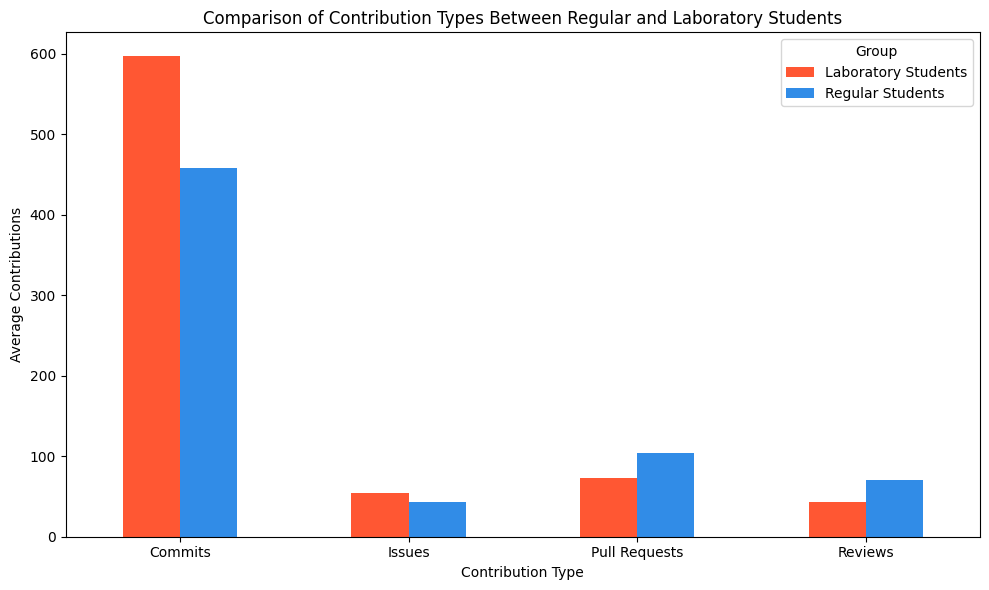

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo (substitua pelos seus dados reais)
lappis_contribution_types = {
    'Commits': lappis_extended_stats['Average Commits'],
    'Pull Requests': lappis_extended_stats['Average Pull Requests'],
    'Issues': lappis_extended_stats['Average Issues'],
    'Reviews': lappis_extended_stats['Average Reviews']
}

eps_contribution_types = {
    'Commits': eps_extended_stats['Average Commits'],
    'Pull Requests': eps_extended_stats['Average Pull Requests'],
    'Issues': eps_extended_stats['Average Issues'],
    'Reviews': eps_extended_stats['Average Reviews']
}

# Criar um DataFrame
data = {
    'Contribution Type': ['Commits', 'Pull Requests', 'Issues', 'Reviews']*2,
    'Average Contributions': list(lappis_contribution_types.values()) + list(eps_contribution_types.values()),
    'Group': ['Laboratory Students']*4 + ['Regular Students']*4
}

df = pd.DataFrame(data)

# Pivotar os dados para melhor visualização no gráfico
pivot_df = df.pivot(index='Contribution Type', columns='Group', values='Average Contributions')

# Plotar o gráfico de barras agrupado
ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=['#FF5733', '#318CE7'])

# Adicionar títulos e rótulos
plt.title('Comparison of Contribution Types Between Regular and Laboratory Students')
plt.xlabel('Contribution Type')
plt.ylabel('Average Contributions')
plt.xticks(rotation=0)  # Ajusta a rotação dos rótulos do eixo x

# Mostrar legenda
plt.legend(title='Group')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import json

# Supondo que 'df' é o seu DataFrame e 'monthly_contributions' já está carregado como dicionário
def analyze_monthly_contributions(df):
    # Extrai todos os dicionários de contribuições mensais para uma lista
    monthly_data = df['monthly_contributions'].apply(pd.Series)
    
    # Média, mediana, e desvio padrão mensais
    monthly_stats = monthly_data.describe().loc[['mean', '50%', 'std']]
    
    # Contribuição máxima e mínima por mês
    max_contributions = monthly_data.max()
    min_contributions = monthly_data.min()
    
    # Somatório de contribuições por ano
    monthly_data.columns = pd.to_datetime(monthly_data.columns, format='%Y-%m')
    yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
    
    return monthly_stats, max_contributions, min_contributions, yearly_sum

# Aplicar a função e imprimir os resultados
monthly_stats, max_contributions, min_contributions, yearly_sum = analyze_monthly_contributions(lappis_normalized)
print("Monthly Stats:\n", monthly_stats)
print("Max Contributions by Month:\n", max_contributions)
print("Min Contributions by Month:\n", min_contributions)
print("Yearly Sum of Contributions:\n", yearly_sum)


Monthly Stats:
         2017-01    2017-02    2017-03    2017-04    2017-05    2017-06  \
mean   9.560372   7.712074  11.280186  11.801858  11.342105  11.704334   
50%    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
std   32.807617  23.015211  38.774128  37.141060  27.572354  31.845035   

        2017-07    2017-08    2017-09    2017-10  ...    2024-03    2024-04  \
mean  10.122291  11.445820  10.760062  13.075851  ...  17.856037  18.445820   
50%    0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
std   34.004089  42.293101  29.109784  31.039742  ...  58.796293  43.210995   

        2024-05    2024-06    2024-07    2024-08    2024-09  2024-10  2024-11  \
mean  17.586687  16.854489  20.414861  18.312693  14.653251      0.0      0.0   
50%    0.000000   0.000000   0.000000   0.000000   0.000000      0.0      0.0   
std   39.731085  39.407557  55.619260  42.292793  33.457559      0.0      0.0   

      2024-12  
mean      0.0  
50%       0.0

/tmp/ipykernel_2446760/3097582270.py:18: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
/tmp/ipykernel_2446760/3097582270.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
